In [29]:
import numpy as np
from fenics import *
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator

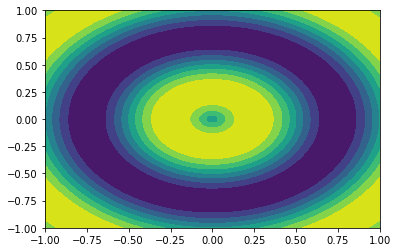

In [2]:
xx = np.linspace(-1, 1, 50)
yy = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xx, yy)

Z = np.sin(2 * np.pi * np.sqrt(X**2 + Y**2))

plt.contourf(X,Y,Z)

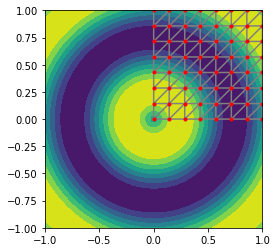

In [34]:
mesh = UnitSquareMesh(7,7)
V = FunctionSpace(mesh, 'CG', 1)
coords = V.tabulate_dof_coordinates()

plt.contourf(X,Y,Z)
plot(mesh)
plt.plot(coords[:,0], coords[:,1], '.r')

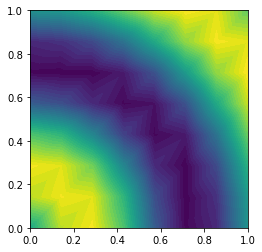

In [35]:
original_coords = np.array([X.reshape(-1), Y.reshape(-1)]).T

interpolator = LinearNDInterpolator(original_coords, Z.reshape(-1))

f = Function(V)
f.vector()[:] = interpolator(coords)
plot(f)